# Unit 5 - Financial Planning

In [20]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [21]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
### Collect Crypto Prices Using the `requests` Library

In [22]:
# Set current amount of crypto assets. 
#Created two variables called `my_btc` and `my_eth`. value set to `1.2` and `5.3`, respectively as mentioned below
my_btc = 1.2
my_eth = 5.3

In [23]:
# Crypto API URLs

#Collected the Crypto Prices Using the `requests` Library as mentioned above
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120176936,
            "total_supply": 120176936,
            "max_supply": 120176936,
            "quotes": {
                "USD": {
                    "price": 2466.57,
                    "volume_24h": 4249455711,
                    "market_cap": 296427664792,
                    "percentage_change_1h": -0.246320539655072,
                    "percentage_change_24h": -0.124589820394496,
                    "percentage_change_7d": -1.6791006803133,
                    "percent_change_1h": -0.246320539655072,
                    "percent_change_24h": -0.124589820394496,
                    "percent_change_7d": -1.6791006803133
                },
                "CAD": {
                    "price": 3350.835345,
                    "volume_24h": 5772885583.3935,
       

In [24]:
#Using the current library to fetch the current price in Canadian dollars (`CAD`) of bitcoin (`BTC`) and ethereum (`ETH`)
my_btc_price_cad = btc_data['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
my_eth_price_cad = eth_data['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
my_btc_value = my_btc_price_cad * my_btc
my_eth_value = my_btc_price_cad * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $67883.16
The current value of your 5.3 ETH is $299817.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [25]:
# Set current amount of shares. 
# Assuming the following amount of shares in stocks and bonds: `50` SPY (stocks) and `200` AGG (bonds)
my_spy = 50
my_agg = 200

In [26]:
#Defining the alpaca api key as api_key and secret_key Alpaca API key and secret key variables, then create the Alpaca API object using the `tradeapi.REST` function from the Alpaca SDK.
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
print(alpaca_api_key, alpaca_secret_key)
# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key,api_version="v2")

PKAACJ1QJWRY69PKHT3S KbSSktf0aPZ4hRiTrwv9oPMbhDWR8fUuvlG1Twbj


In [27]:
# Format current date as ISO format
today = pd.Timestamp('2023-12-15', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

tickers_df = api.get_bars(tickers, timeframe, start = today, end = today).df

tickers_df['symbol']

# Reorganize the DataFrame
# Separate ticker data

agg_df = tickers_df[tickers_df['symbol'] == "AGG"].drop('symbol',axis=1)
spy_df = tickers_df[tickers_df['symbol'] == "SPY"].drop('symbol',axis=1)   

# Concatenate the ticker DataFrames

new_tickers_df = pd.concat([agg_df, spy_df], axis = 1, keys=['AGG','SPY'])

# Preview DataFrame

new_tickers_df

AGG                                            \
                           close   high    low trade_count  open    volume   
timestamp                                                                    
2023-12-15 05:00:00+00:00  98.69  98.88  98.59       37771  98.8  10079203   

                                         SPY                               \
                                vwap   close   high       low trade_count   
timestamp                                                                   
2023-12-15 05:00:00+00:00  98.733271  469.33  470.7  467.4263      667849   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-15 05:00:00+00:00  469.49  141529826  469.34935

In [28]:
# Pick AGG and SPY close prices
# Extraced the closing price of agg & spy (98.69 & 469.33) along with time stamp and date. 
agg_close_price = float(new_tickers_df['AGG']['close'])
spy_close_price = float(new_tickers_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.69
Current SPY closing price: $469.33


C:\Users\sobii\AppData\Local\Temp\ipykernel_12608\2788755744.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  agg_close_price = float(new_tickers_df['AGG']['close'])
C:\Users\sobii\AppData\Local\Temp\ipykernel_12608\2788755744.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spy_close_price = float(new_tickers_df['SPY']['close'])


In [29]:
# Compute the current value of shares
# The current value of AGG & SPY share are ($19,738/$23,346.5) respectevely.
agg_value = my_agg * agg_close_price
spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")

The current value of your 200 AGG shares is $19738.00
The current value of your 50 SPY shares is $23466.50


### Savings Health Analysis

In [30]:
# Set monthly household income. Created a variable monthly_income
monthly_income = 12000

# Consolidate financial assets data
shares_total = round(spy_value+agg_value,2)
crypto_total = round(my_eth_value+my_btc_value,2)

savings_dict = {'amount':[crypto_total,shares_total]}

# Create savings DataFrame
df_savings = pd.DataFrame(savings_dict, index = ['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,367700.44
shares,43204.50


<Axes: title={'center': 'composition of Personal Savings'}, ylabel='amount'>

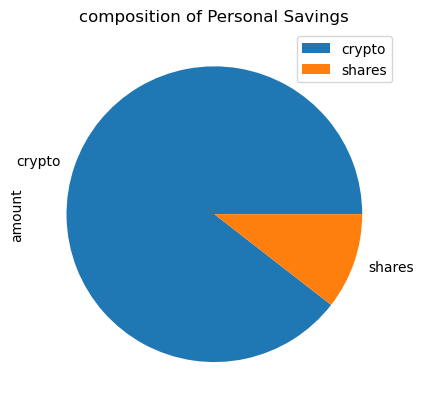

In [31]:
# Plot savings pie chart. Able to visualize the composition of personal savings.
df_savings.plot.pie(y = 'amount',title = 'composition of Personal Savings')

In [32]:
# Set ideal emergency fund
#Using the if conditions, able to extract the emergency funds and the result is "having enoufgh money in this fund".
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_average = df_savings['amount'].sum()

# Validate saving health
if total_average>emergency_fund:
    print('You are having enough money in this fund. Congraluation!')
elif total_savings==emergency_fund:
    print('You are reaching this financial goal. Congraluation!')
else:
    print(f"You are ${emergencyfund - total_savings} away from reaching your financial saving's goal.")

You are having enough money in this fund. Congraluation!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [33]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
tickers_5yr_df = api.get_bars(tickers, timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_5yr_df = tickers_5yr_df[tickers_5yr_df['symbol']=='AGG'].drop('symbol', axis=1)

spy_5yr_df = tickers_5yr_df[tickers_5yr_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_5yr_df, spy_5yr_df], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(portfolio_data = df_stock_data, weights=[0.40,0.60],num_simulation = 500,num_trading_days = 252*30)

In [36]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [ ]:

# Able to run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

# Plot simulation outcomes
MC_30years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

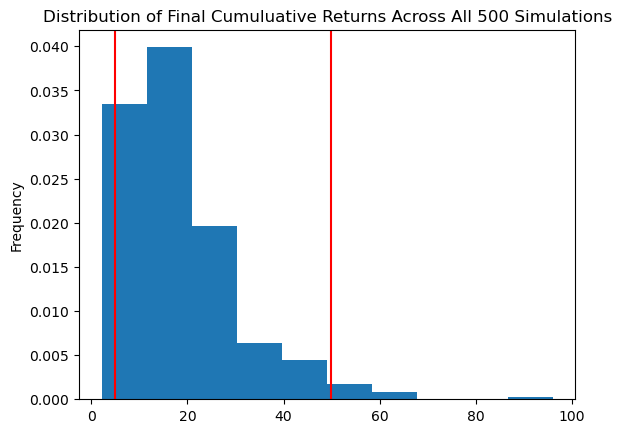

In [38]:
# Plot probability distribution and confidence intervals
MC_30years.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30years_summary = MC_30years.summarize_cumulative_return()

# Print summary statistics
print (MC_30years_summary)

count           500.000000
mean             18.488992
std              12.021172
min               2.179916
25%              10.295217
50%              15.393053
75%              23.490561
max              95.955117
95% CI Lower      5.006657
95% CI Upper     49.806223
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_30years_summary[8]*initial_investment,2)
ci_upper = round(MC_30years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100133.15 and $996124.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_30years_summary[8]*initial_investment,2)
ci_upper = round(MC_30years_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $150199.72 and $1494186.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

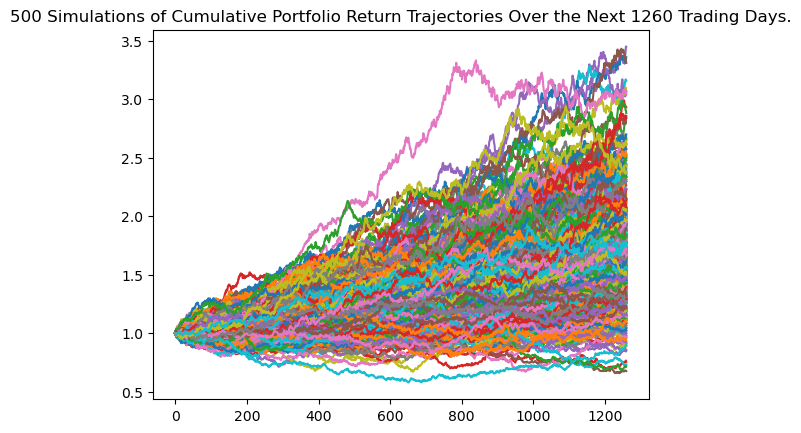

In [56]:
# Plot simulation outcomes
MC_fiveyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

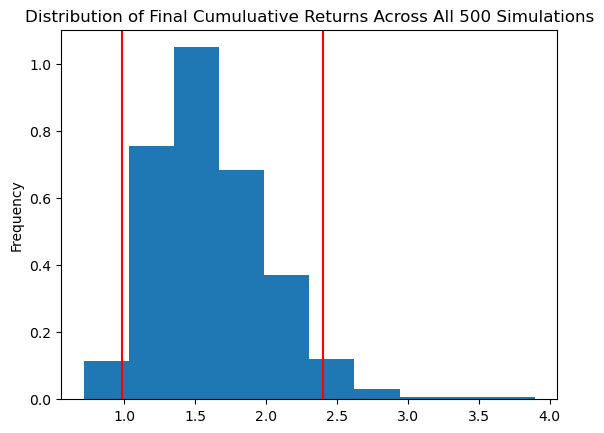

In [59]:
# Plot probability distribution and confidence intervals
MC_fiveyear.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_fiveyear = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(MC_fiveyear)

count           500.000000
mean              1.612324
std               0.407218
min               0.714834
25%               1.320673
50%               1.575186
75%               1.860949
max               3.895339
95% CI Lower      0.980196
95% CI Upper      2.401875
Name: 1260, dtype: float64


In [67]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = initial_investment*MC_fiveyear[8]
ci_upper_five = initial_investment*MC_fiveyear[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58811.768257474876 and $144112.51312277318


### Ten Years Retirement Option

In [68]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.25,0.75],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears.calc_cumulative_return()

<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

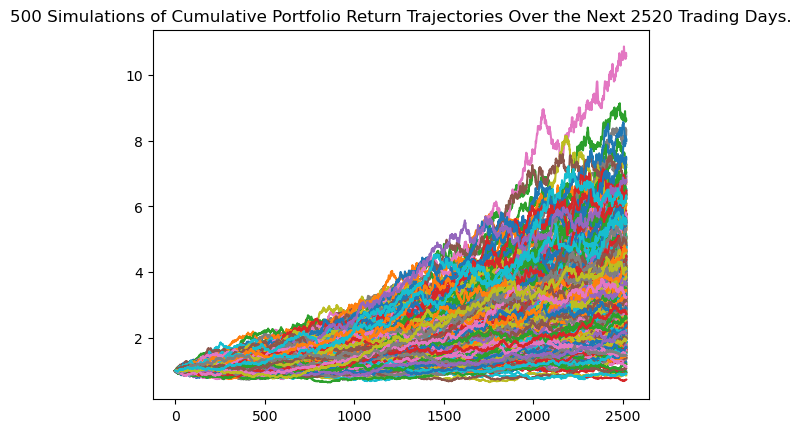

In [71]:
# Plot simulation outcomes
MC_tenyears.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

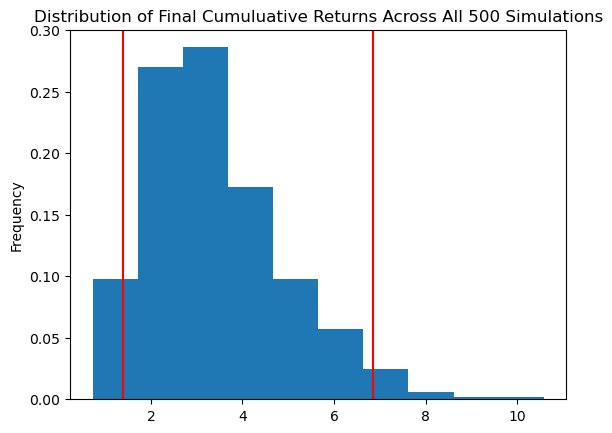

In [72]:
# Plot probability distribution and confidence intervals
MC_tenyears.plot_distribution()

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tenyears = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(MC_tenyears)

count           500.000000
mean              3.433635
std               1.503310
min               0.729376
25%               2.309692
50%               3.162344
75%               4.263295
max              10.582481
95% CI Lower      1.382466
95% CI Upper      6.856166
Name: 2520, dtype: float64


In [76]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment * MC_tenyears[8]
ci_upper_ten = initial_investment * MC_tenyears[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $82947.95868089034 and $411369.94678272033
